In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('dataset_harga_rumah.csv')
df

,LuasBangunan,JumlahKamar,UsiaBangunan,Harga
0,109.934283,5,43,330732241
1,97.234714,2,19,291581435
2,112.953771,4,5,384984574
3,130.460597,6,11,453875180
4,95.316933,4,12,304229790
...,...,...,...,...
995,94.377994,4,4,311366139
996,135.953731,5,26,380455338
997,112.816857,2,40,277408530
998,88.576420,4,9,292941173


In [14]:
#menghapus nilai duplikat
df_no_duplicate = df.drop_duplicates()
print (df.drop_duplicates())

     LuasBangunan  JumlahKamar  UsiaBangunan      Harga
0      109.934283            5            43  330732241
1       97.234714            2            19  291581435
2      112.953771            4             5  384984574
3      130.460597            6            11  453875180
4       95.316933            4            12  304229790
..            ...          ...           ...        ...
995     94.377994            4             4  311366139
996    135.953731            5            26  380455338
997    112.816857            2            40  277408530
998     88.576420            4             9  292941173
999    111.451656            3             5  342617473

[1000 rows x 4 columns]


**Statistik Dasar**

In [15]:
#menampilkan data statistik
df_stats = df.describe()
print (df_stats)

       LuasBangunan  JumlahKamar  UsiaBangunan         Harga
count   1000.000000  1000.000000   1000.000000  1.000000e+03
mean     100.386641     4.045000     25.516000  3.009556e+08
std       19.584319     1.424431     14.137596  6.088611e+07
min       35.174653     2.000000      1.000000  9.014722e+07
25%       87.048194     3.000000     13.000000  2.605167e+08
50%      100.506012     4.000000     26.000000  2.978603e+08
75%      112.958878     5.000000     38.000000  3.418402e+08
max      177.054630     6.000000     49.000000  5.118922e+08


**Distribusi**

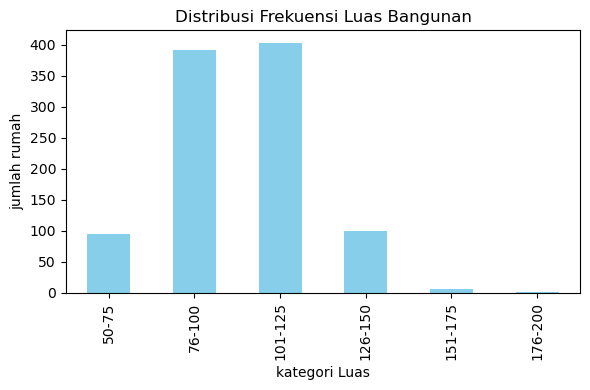

In [29]:
luas_labels = ['50-75', '76-100', '101-125', '126-150', '151-175', '176-200']
luas_bins = [50,75,100,125,150,175,200]

#kolom luas kategori
df['LuasKategori'] = pd.cut(df['LuasBangunan'], bins=luas_bins, labels=luas_labels, include_lowest = True)
plt.figure(figsize=(6,4))
df['LuasKategori'].value_counts().sort_index().plot(kind='bar', color='skyblue')

plt.title("Distribusi Frekuensi Luas Bangunan")
plt.xlabel("kategori Luas")
plt.ylabel ("jumlah rumah")
plt.tight_layout()
plt.show()

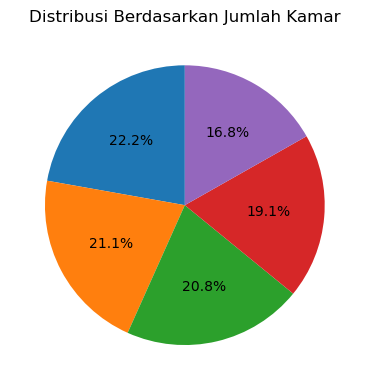

In [34]:
plt.figure(figsize=(6,4))
plt.pie(df['JumlahKamar'].value_counts(), startangle=90, autopct='%1.1f%%')
plt.title("Distribusi Berdasarkan Jumlah Kamar")
plt.tight_layout()
plt.show()

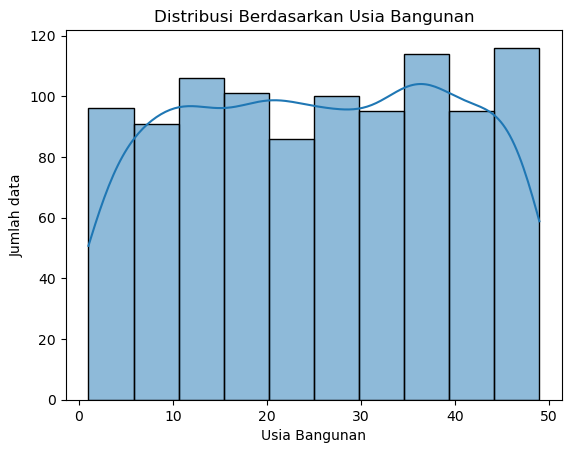

In [40]:
sns.histplot(df['UsiaBangunan'], bins=10, kde=True)
plt.title('Distribusi Berdasarkan Usia Bangunan')
plt.xlabel('Usia Bangunan')
plt.ylabel ('Jumlah data')
plt.show()

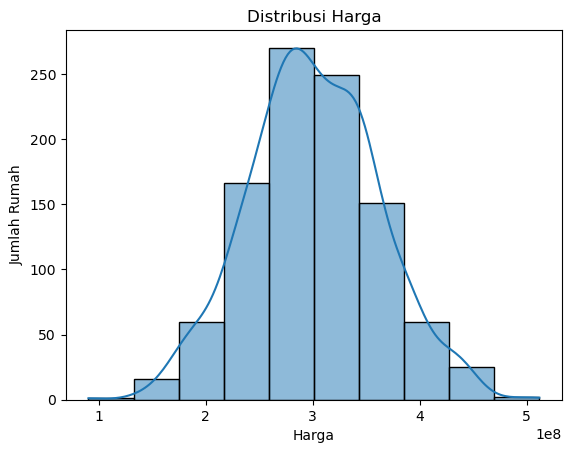

In [41]:
sns.histplot(df['Harga'], bins=10, kde=True)
plt.title('Distribusi Harga')
plt.xlabel('Harga')
plt.ylabel('Jumlah Rumah')
plt.show()

**Korelasi**

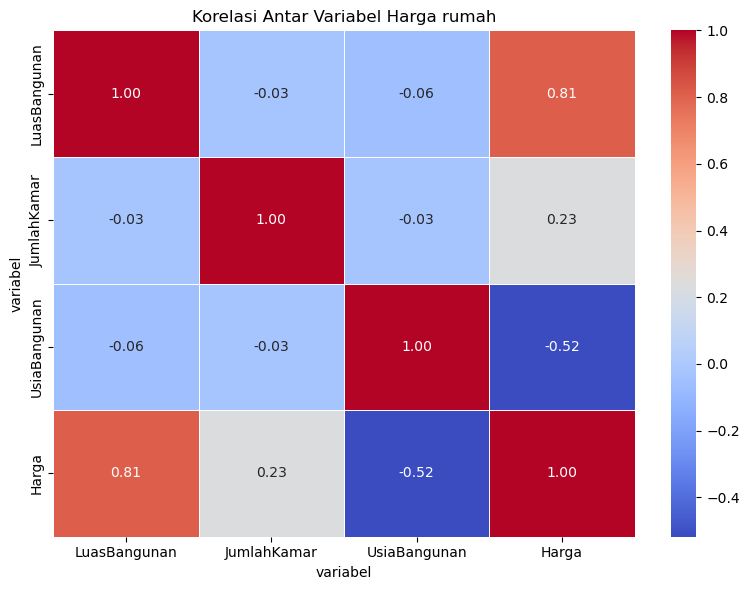

In [46]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title ("Korelasi Antar Variabel Harga rumah")
plt.xlabel('variabel')
plt.ylabel('variabel')
plt.tight_layout()
plt.show()

**Regresi Linier**

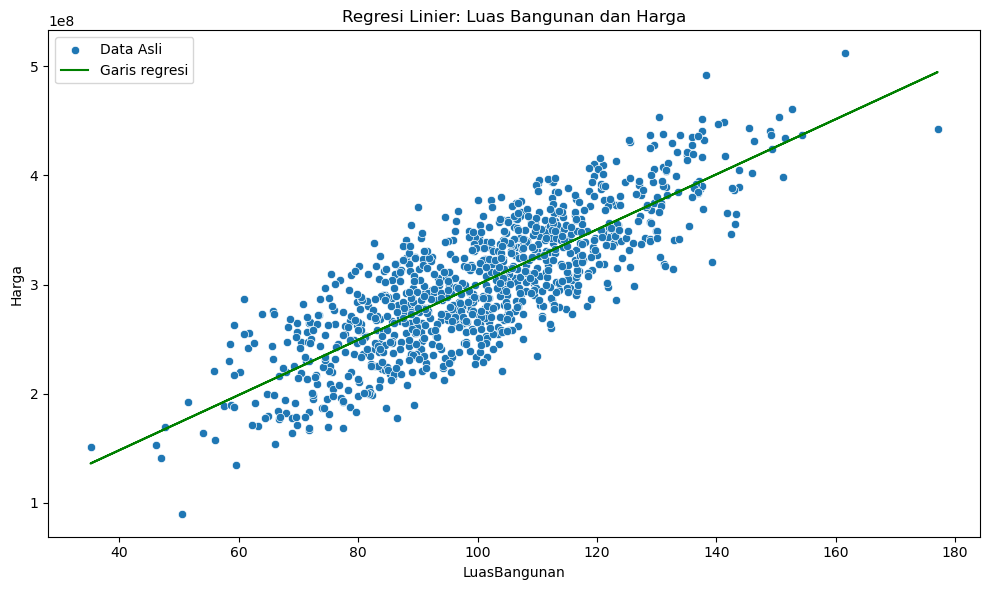

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df['LuasBangunan'].values.reshape(-1,1)
Y = df['Harga']
model = LinearRegression()
model.fit(X,Y)

y_pred = model.predict(X)
r2 = r2_score(Y,y_pred)

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['LuasBangunan'], y=df['Harga'], label='Data Asli')
plt.plot(df['LuasBangunan'], y_pred, color='green', label='Garis regresi')
plt.xlabel('LuasBangunan')
plt.ylabel('Harga')
plt.title('Regresi Linier: Luas Bangunan dan Harga')
plt.legend()
plt.tight_layout()
plt.show()



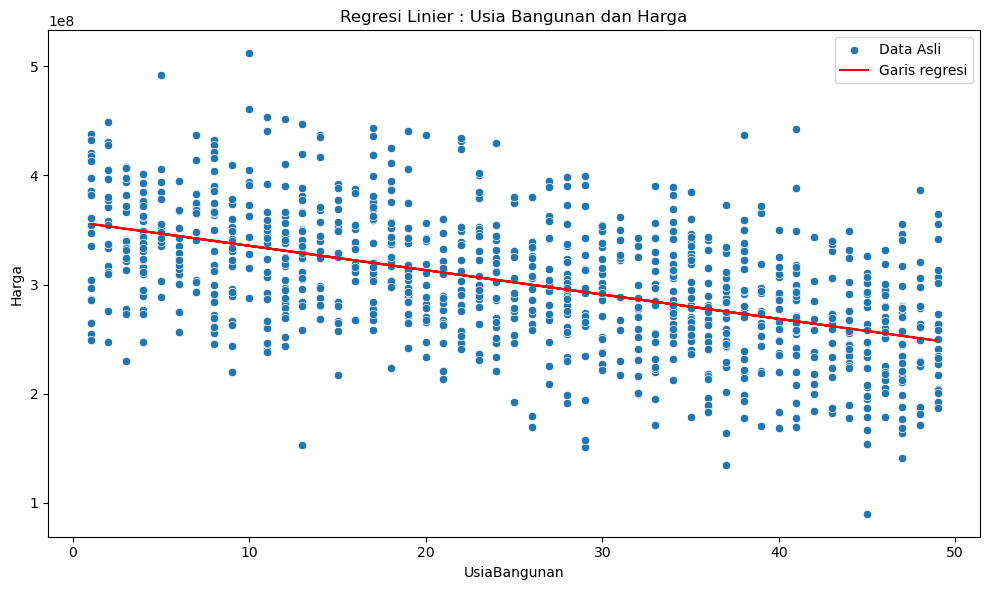

In [62]:
X=df['UsiaBangunan'].values.reshape(-1,1)
y=df['Harga']
model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)
r2 = r2_score(y,y_pred)

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['UsiaBangunan'], y=df['Harga'], label='Data Asli')
plt.plot(df['UsiaBangunan'], y_pred, color='red', label='Garis regresi')
plt.title ('Regresi Linier : Usia Bangunan dan Harga')
plt.xlabel('UsiaBangunan')
plt.ylabel('Harga')
plt.legend()
plt.tight_layout()
plt.show()